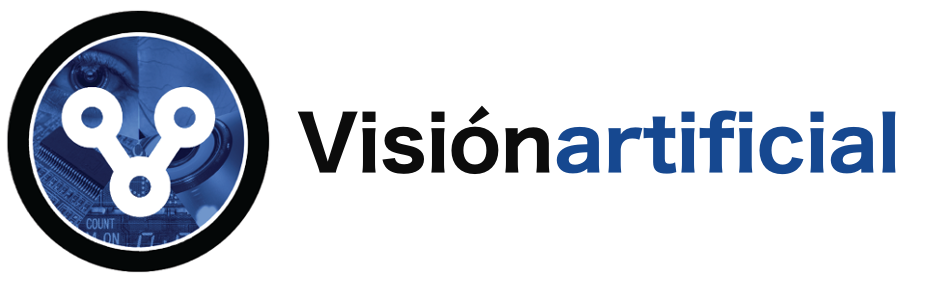

# OpenCV 

### para a materia de Visión Artificial do Grao de Robótica. EPSE de Lugo.

<hr style = "border: none; height: 4px; background-color: # D3D3D3" />

# <font style="color:rgb(50,120,229)">Descriptor SIFT</font> 

O descritor SURF, introducido por Bay et al. no seu artigo do ECCV de 2006, [SURF: Speeded Up Robust Features](../artigos/bay_2006.pdf) , é en realidade moi semellante ao descritor SIFT, pero ten dúas vantaxes principais.

A primeira vantaxe é que SURF é máis rápido de calcular que SIFT, polo que é máis axeitado para aplicacións en tempo real.

A segunda vantaxe de SURF é que só ten a metade do tamaño do descritor SIFT. Lembre da nosa lección anterior que SIFT devolve un vector de características de 128 dim — SURF, pola súa banda, devolve un vector de características de 64 dim.

Imos discutir o descritor **SURF**.


## <font style="color:rgb(50,120,229)">Obxectivos</font>

O obxectivo deste caderno é revisar o descritor de funcións SIFT.
     
     
## <font style="color:rgb(50,120,229)">Como funciona SURF?</font>     
     
Do mesmo xeito que en SIFT, o primeiro paso en SURF é seleccionar a rexión rectangular da imaxe que rodea o punto clave. O tamaño exacto da rexión determínase durante a fase de detección de puntos clave, que normalmente é o método Fast Hessian:


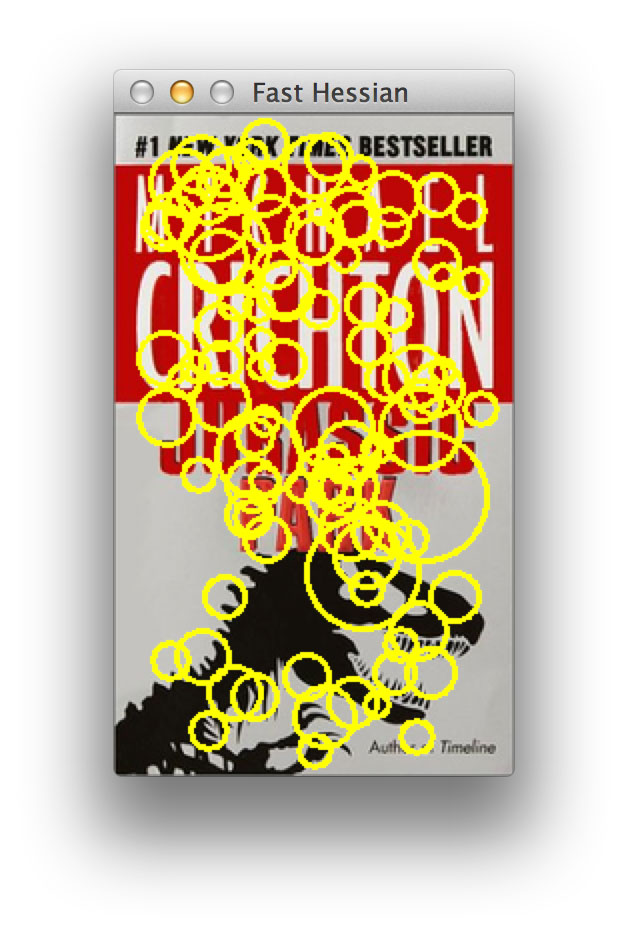
Na segunda etapa de SURF, recorremos cada un dos puntos clave detectados e dividimos a rexión do punto clave en subáreas de 4 x 4, de novo, igual que SIFT:

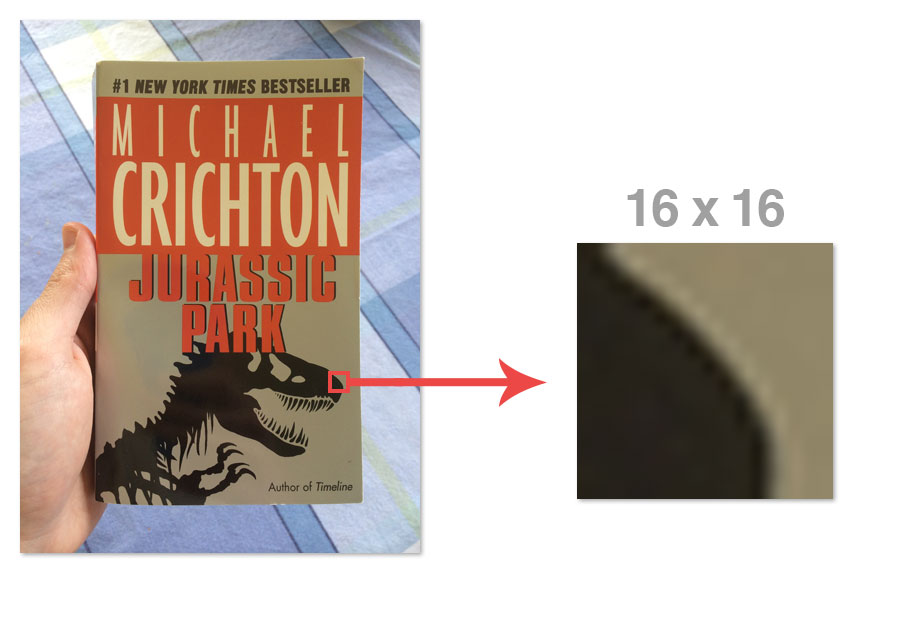
Non obstante, aquí é onde SIFT e SURF comezan a separarse. Para cada unha destas 4 x 4 subáreas, as respostas das wavelets de Haar extráense en 5 x 5 puntos de mostra regularmente espazados.

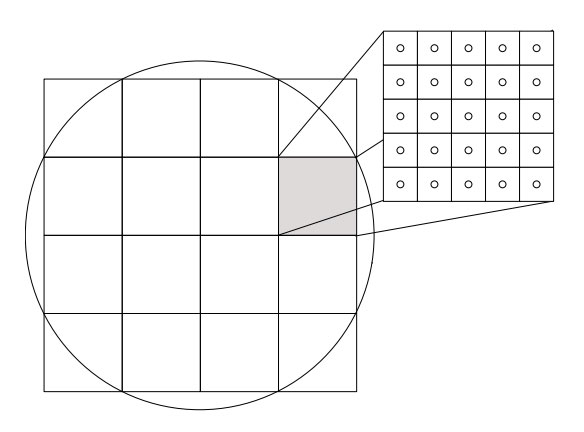

Para cada xanela, calcúlase unha resposta de Haar tanto na dirección x como na dirección y. Chamaremos a estas respostas $d_{x}$ e $d_{y}$, respectivamente:

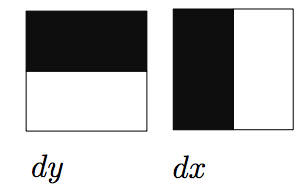
Agora que temos $d_{x}$ e $d_{y}$, pesémolas cun kernel gaussiano (como en SIFT). As respostas que están máis afastadas do centro do punto clave contribuirán menos ao vector de características final, mentres que as respostas que están máis preto do centro do punto clave contribuirán máis ao vector de características final.

O paso final en SURF é calcular o vector de características. Para cada unha das 4 x 4 subáreas, calculamos:
$v = \{\sum d_{x} \sum d_{y} \sum |d_{x}| \sum |d_{y}| \}$

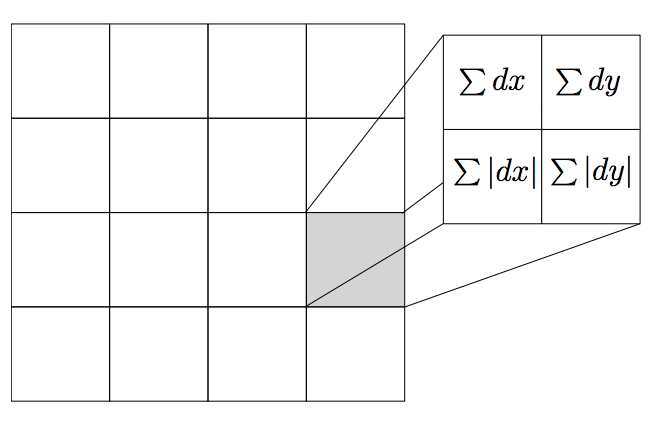

As dúas primeiras entradas do vector de características, $\sum d_{x}$ e $\sum d_{y}$, son simplemente abstraccións das respostas de onda de Haar. Nas dúas segundas entradas, $\sum |d_{x}|$ e $\sum |d_{y}|$, tomamos o valor absoluto para introducir información sobre os signos dos cambios de intensidade.

Así, temos 4 x 4 = 16 subáreas, cada unha delas devolvendo un vector de 4-dim. Estes vectores de características con 4-dim son todos concatenados. Polo tanto, 16 x 4 = 64-dim para o vector de características SURF final.

Por último, o vector de características de 64 dim resultante está normalizado en L2.

De novo, o vector de características SURF é máis rápido de calcular que SIFT e a metade do tamaño de SIFT, polo que o fai máis adecuado tanto para aplicacións en tempo real como para aplicacións con recursos limitados.


## <font style="color:rgb(50,120,229)">Vexamos estas ideas en acción ...</font>

Igual que fixemos no SIFT, mantemos este exemplo de SURF moi breve.

In [1]:
# importamos paquetes
from __future__ import print_function
import argparse
import cv2
import imutils

args={"image":"../dataset/jp_01.png"}

# cargamos a imaxe e pasamola a gris
image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Inicializamos o detector para opencv 3+
# detectamos os puntos de interese e achamos sobre eles os descritores SURF
detector = cv2.xfeatures2d.SURF_create()
(kps, descs) = detector.detectAndCompute(gray, None)

# Visualizamos os puntos detectados e a forma dos vectores de caracteristicas
print("[INFO] # de keypoints detectados: {}".format(len(kps)))
print("[INFO] dimensions do vector de caracteristicas: {}".format(descs.shape))

error: OpenCV(4.5.1) /tmp/pip-req-build-jr1ur_cf/opencv_contrib/modules/xfeatures2d/src/surf.cpp:1027: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'create'
